# Master TIDE - Conférences Python 2020

Francis Wolinski

&copy; 2020 Yotta Conseil

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline

# display options
pd.set_option("display.max_rows", 20)

# 10. Séries temporelles


Introduction aux séries temporelles avec Python et pandas.

Le module standard `datetime` permet de manipuler des données temporelles avec Python.

Il existe d'autres modules avec le même objectif: `calendar`, `dateutil`, `pytz`, ...

Le module `datetime` fournit différents types de données temporelles :

- **date**: date (année, mois, jour) dans le caledrier Grégorien
- **time**: temps non rattaché à une date (heures, minutes, secondes, microsecondes)
- **datetime**: horodatage (date + temps)
- **timedelta**: durée, difference entre 2 dates ou 2 temps (jours, heures, minutes, secondes, microsecondes)
- **tzinfo**: gestion des fuseaux horaires

In [2]:
# import de la librairie datetime
import datetime

## 10.1 Objets temporels Python

### Date

In [3]:
# date
today = datetime.date.today()
today

datetime.date(2020, 12, 10)

### Datetime

In [4]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2020, 12, 10, 14, 5, 28, 758388)

In [5]:
# datetime en temps universel
now_utc = datetime.datetime.utcnow()
now_utc

datetime.datetime(2020, 12, 10, 13, 5, 59, 513147)

### Fuseau horaire

Le module standard `pytz` gère les fuseaux horaires.

Un objet de type `datetime` peut être converti avec la méthode `astimezone()` dans un objet `datetime` d'un autre fuseau horaire.

Il est recommandé de travailler en temps universel (UTC) pour pallier la difficulté de gérer des objets de temps de différents fuseaux horaires.

In [6]:
# import pytz
from pytz import timezone

In [7]:
# instance de fuseau horaire
tz = timezone('Asia/Shanghai')
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

In [8]:
# now
now

datetime.datetime(2020, 12, 10, 14, 5, 28, 758388)

In [9]:
# convertit une datetime avec un objet de type fuseau horaire
now.astimezone(tz)

datetime.datetime(2020, 12, 10, 21, 5, 28, 758388, tzinfo=<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>)

## 10.2 Ecriture et lecture

La méthode `strftime()` et la fonction `strptime()`  permettent d'écrire et de lire des dates dans différents formats avec une codificaton empruntée au langage C.

Le nombre de directives disponibles révèle la complexité du sujet.

Directives | Commentaires
- | -
%a | Day of the week abbreviated
%A | Day of the week
%w | Day of the week 0 = Sunday ... 6 = Saturday
%d | Day of month on 2 digits 01, 02, ..., 31
%j | Day of year on 3 digits 001, 002, ..., 366
%b | Month abbreviated
%B | Month name
%m | Month on 2 digits 01, 02, ..., 12
%U | Number of week in year (Sunday = first day)
%W | Number of week in year (Monday = first day)
%y | Year without the century on 2 digits 00, 01, ..., 99	 
%Y | Year with the century on 4 digits 0001, 0002, ..., 2018, 2019, ..., 9998, 9999
%H | Hour over 24 00, 01, ..., 23
%I | Hour over 12 01, 02, ..., 12
%p | AM or PM
%M | Minute on 2 digits 00, 01, ..., 59
%S | Second on 2 digits 00, 01, ..., 59
%f | Microsecond on 6 digits 000000, 000001, ..., 999999
%z | UTC offset +HHMM or -HHMM
%Z | Time zone 
%c | Representation date and temps
%x | Representation date
%X | Representation time
%% | Character %

In [10]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2020, 12, 10, 14, 12, 4, 406018)

In [11]:
# jour de la semaine
now.strftime("%A %d/%m/%Y")

'Thursday 10/12/2020'

<div class="alert alert-success">
<b>Exercise 1</b>
<ul>
<li>Afficher la date du jour dans le format: `AAAA-MM-JJ/HH:MM:SS`</li>
</ul>
</div>

In [13]:
now.strftime("%Y-%m-%d/%H:%M:%S")

'2020-12-10/14:12:04'

Le module `locale` permet de gérer l'affichage selon la langue, par défaut en anglais.

In [14]:
import locale
locale.setlocale(locale.LC_ALL, 'fr') # français
#locale.setlocale(locale.LC_ALL, 'fr_FR') # français
#locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8') # français

print(now.strftime("%A %d/%m/%Y"))

locale.setlocale(locale.LC_ALL, 'en') # anglais
#locale.setlocale(locale.LC_ALL, 'en_US') # anglais

jeudi 10/12/2020


'en'

Inversement la fonction `strptime()` prend une chaine de caractères et un format de date en arguments et retourne un objet temporel.

In [16]:
# lecture à partir du format: AA-MM-DD-HH-MM
# écriture dans le format : HH:MM DD/MM/YYYY
var = datetime.datetime.strptime("20-03-26-15-00", "%y-%m-%d-%H-%M")
var.strftime("%H:%M %d/%m/%Y")

'15:00 26/03/2020'

<div class="alert alert-success">
<b>Exercise 2</b>
<ul>
<li>Lire une date au format ISO : `AAAA-MM-JJTHH:MM:SS`, par exemple 2020-03-26T15:00:00</li>
</ul>
</div>

In [17]:
var = datetime.datetime.strptime("2020-03-26T15:00:00",
                                 "%Y-%m-%dT%H:%M:%S")
var

datetime.datetime(2020, 3, 26, 15, 0)

<div class="alert alert-success">
<b>Exercise 3</b>
<ul>
    <li>Charger le fichier 'cities500.txt', combien y a-t-il de fuseaux horaires différents ?</li>
    <li>Convertir la colonne 'timezone' en objets de type fuseau horaire.</li>
    <li>Prendre l'horodatage du jour et la convertir selon chaque fuseau horaire et produire une chaine au format : '%Y-%m-%d %H:%M:%S'.</li>
    <li> Il y a 24 heure dans une journée, combien y a-t-il de fuseaux horaires différents ?</li>
</ul>
</div>

In [28]:
# cities500.txt
# http://download.geonames.org/export/dump/cities500.zip
df = pd.read_csv('cities500.txt',
                   sep='\t',
                   header=None,
                   names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date'],
                   dtype={'admin1 code': str, 'admin2 code': str, 'admin3 code': str, 'admin4 code': str},
                   keep_default_na=False,
                   na_values=['', -9999])
df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3038999,Soldeu,Soldeu,NaN,42.57688,1.66769,P,PPL,AD,NaN,02,NaN,NaN,NaN,602,NaN,1832.0,Europe/Andorra,2017-11-06
1,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,PPL,AD,NaN,02,NaN,NaN,NaN,1052,NaN,1721.0,Europe/Andorra,2012-11-03
2,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,06,NaN,NaN,NaN,8022,NaN,921.0,Europe/Andorra,2013-11-23
3,3039604,Pas de la Casa,Pas de la Casa,"Pas de la Kasa,Пас де ла Каса",42.54277,1.73361,P,PPL,AD,NaN,03,NaN,NaN,NaN,2363,2050.0,2106.0,Europe/Andorra,2008-06-09
4,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,NaN,05,NaN,NaN,NaN,3066,NaN,1296.0,Europe/Andorra,2018-10-26


In [25]:
var = pd.read_csv('cities500.txt',
                   sep='\t',
                   header=None)
var.nunique()

0     196576
1     166024
2     164922
3     154162
4     177374
5     182324
6          1
7         18
8        245
9        111
10       634
11     14415
12     38782
13     28022
14     33707
15      1938
16      3961
17       401
18      3364
dtype: int64

In [27]:
var.isnull().sum()

0          0
1          0
2         17
3      35083
4          0
5          0
6          0
7          1
8         45
9     190198
10        35
11     46469
12    107915
13    164123
14         0
15    163168
16         0
17         0
18         0
dtype: int64

In [29]:
df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3038999,Soldeu,Soldeu,NaN,42.57688,1.66769,P,PPL,AD,NaN,02,NaN,NaN,NaN,602,NaN,1832.0,Europe/Andorra,2017-11-06
1,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,PPL,AD,NaN,02,NaN,NaN,NaN,1052,NaN,1721.0,Europe/Andorra,2012-11-03
2,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,06,NaN,NaN,NaN,8022,NaN,921.0,Europe/Andorra,2013-11-23
3,3039604,Pas de la Casa,Pas de la Casa,"Pas de la Kasa,Пас де ла Каса",42.54277,1.73361,P,PPL,AD,NaN,03,NaN,NaN,NaN,2363,2050.0,2106.0,Europe/Andorra,2008-06-09
4,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,NaN,05,NaN,NaN,NaN,3066,NaN,1296.0,Europe/Andorra,2018-10-26


In [32]:
df['timezone'].nunique()

401

In [33]:
df['timezone'].values

array(['Europe/Andorra', 'Europe/Andorra', 'Europe/Andorra', ...,
       'Africa/Harare', 'Africa/Harare', 'Africa/Harare'], dtype=object)

In [36]:
df['timezone'].apply(timezone)

0         Europe/Andorra
1         Europe/Andorra
2         Europe/Andorra
3         Europe/Andorra
4         Europe/Andorra
               ...      
196571     Africa/Harare
196572     Africa/Harare
196573     Africa/Harare
196574     Africa/Harare
196575     Africa/Harare
Name: timezone, Length: 196576, dtype: object

In [40]:
now = datetime.datetime.now()
now

datetime.datetime(2020, 12, 10, 14, 45, 38, 369210)

In [43]:
df['timezone'].apply(timezone)\
            .apply(lambda tz: now.astimezone(tz))\
            .apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M:%S'))\
            .nunique()

36

## 10.3 Séries temporelles

Le librairie `pandas` gère les séries temporelles.

Nous allons introduire quelques notions :
- lecture de données temporelles
- accès aux données temporelles
- calcul d'agrégats temporels
- graphiques et fenêtres glissantes

### Chargement et préparation des données

In [ ]:
from urllib import request
import shutil

url = 'http://webstat.banque-france.fr/fr/downloadFile.do?id=5385698&exportType=csv'
filename = 'Webstat_Export.csv'

# requête du fichier sur le web et sauvegarde locale
with request.urlopen(url) as response, open(filename, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

In [44]:
# source:
# https://www.banque-france.fr/statistiques/taux-et-cours/les-taux-de-change-salle-des-marches/parites-quotidiennes

# chargement du fichier
exchange_rates = pd.read_csv("Webstat_Export.csv",
                        sep=";",
                        header=2,
                        na_values='-',
                        converters={0: lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='ignore')})
exchange_rates

,Unité :,Dollar Australien (AUD),Lev Nouveau (BGN),Real Bresilien (BRL),Dollar Canadien (CAD),Franc Suisse (CHF),Yuan Ren Min Bi (CNY),Livre Cypriote (CYP),Couronne Tcheque (CZK),Couronne Danoise (DKK),...,Nouveau Ron (RON),Rouble Russe (RUB) (RUB),Couronne Suedoise (SEK),Dollar de Singapour (SGD),Tolar (SIT),Couronne Slovaque (SKK),Baht (THB),Nouvelle Livre Turque (TRY),Dollar des Etats-Unis (USD),Rand (ZAR)
0,Magnitude :,Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),...,Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0),Unités (0)
1,Méthode d'observation :,Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),...,Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A),Moyenne de la période (A)
2,Source :,BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),...,BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0),BCE (Banque Centrale Européenne) (4F0)
3,2020-11-24 00:00:00,"1,6175","1,9558","6,3943","1,5504","1,0833","7,8152",NaN,"26,258","7,4424",...,"4,8728","90,1119","10,204","1,5941",NaN,NaN,"36,07","9,4452","1,1865","18,2206"
4,2020-11-23 00:00:00,"1,6233","1,9558","6,3795","1,553","1,0806","7,8178",NaN,"26,311","7,4472",...,"4,874","90,3507","10,2145","1,5955",NaN,NaN,"36,048","9,2636","1,1901","18,2466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,1999-01-08 00:00:00,"1,8406",NaN,NaN,"1,7643","1,6138",NaN,"0,58187","34,938","7,4433",...,"1,3143","27,2075","9,165","1,9537","188,84","42,56","42,559","0,3718","1,1659","6,7855"
7995,1999-01-07 00:00:00,"1,8474",NaN,NaN,"1,7602","1,6165",NaN,"0,58187","34,886","7,4431",...,"1,3092","26,9876","9,18","1,9436","188,8","42,765","42,1678","0,3701","1,1632","6,8283"
7996,1999-01-06 00:00:00,"1,882",NaN,NaN,"1,7711","1,6116",NaN,"0,582","34,85","7,4452",...,"1,3168","27,4315","9,305","1,9699","188,7","42,778","42,6949","0,3722","1,1743","6,7307"
7997,1999-01-05 00:00:00,"1,8944",NaN,NaN,"1,7965","1,6123",NaN,"0,5823","34,917","7,4495",...,"1,3168","26,5876","9,4025","1,9655","188,775","42,848","42,5048","0,3728","1,179","6,7975"


#### Préparation des données :

- extraction des codes ISO des devises
- sélection des lignes
- sélection de quelques devises
- traitement des dates avec la fonction `to_datetime()`
- drop NaN
- traitement des nombres flottants
- reset de l'index

In [45]:
cols = pd.Series(exchange_rates.columns.tolist()).str.extract('\(([A-Z]{3})\)', expand=True)
cols

,0
0,NaN
1,AUD
2,BGN
3,BRL
4,CAD
...,...
35,SKK
36,THB
37,TRY
38,USD


In [46]:
# extraction des code ISO des monnaies
cols = pd.Series(exchange_rates.columns.tolist()).str.extract('\(([A-Z]{3})\)', expand=True)
cols.iloc[0] = 'Date'
exchange_rates.columns = cols[0]

# sélection des lignes
exchange_rates = exchange_rates.iloc[3:]

# sélection de quelques devises
currencies = ['USD', 'CHF', 'GBP', 'JPY', 'RUB', 'CNY']
exchange_rates = exchange_rates[['Date'] + currencies]

# traitement des dates
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'], format='%d/%m/%Y', errors='ignore')


# drop nan
exchange_rates = exchange_rates.dropna()

# traitement des nombres flottants
import re
exchange_rates[currencies] = exchange_rates[currencies].applymap(lambda x: float(re.sub(',', '.', x)))

# reset index
exchange_rates = exchange_rates.reset_index(drop=True)
exchange_rates

,Date,USD,CHF,GBP,JPY,RUB,CNY
0,2020-11-24,1.1865,1.0833,0.89012,124.06,90.1119,7.8152
1,2020-11-23,1.1901,1.0806,0.88888,123.47,90.3507,7.8178
2,2020-11-20,1.1863,1.0811,0.89393,123.18,90.2622,7.7916
3,2020-11-19,1.1832,1.0797,0.89378,123.08,90.2638,7.7927
4,2020-11-18,1.1868,1.0812,0.89373,123.28,90.0610,7.7820
...,...,...,...,...,...,...,...
5334,2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
5335,2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
5336,2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
5337,2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632


In [47]:
# info
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5339 non-null   datetime64[ns]
 1   USD     5339 non-null   float64       
 2   CHF     5339 non-null   float64       
 3   GBP     5339 non-null   float64       
 4   JPY     5339 non-null   float64       
 5   RUB     5339 non-null   float64       
 6   CNY     5339 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 292.1 KB


### L'opérateur `dt`

L'opérateur `dt` se comporte de manière analogue à l'opérateur `str` pour les `Series`. Il permet d'accéder aux propriététs temporelles des éléments.

In [48]:
# date
exchange_rates['Date']

0      2020-11-24
1      2020-11-23
2      2020-11-20
3      2020-11-19
4      2020-11-18
          ...    
5334   2000-01-19
5335   2000-01-18
5336   2000-01-17
5337   2000-01-14
5338   2000-01-13
Name: Date, Length: 5339, dtype: datetime64[ns]

In [49]:
# les valeurs sont des numpy.datetime64
exchange_rates['Date'].values[0]

numpy.datetime64('2020-11-24T00:00:00.000000000')

In [50]:
# accès à l'année
exchange_rates['Date'].dt.year

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
5334    2000
5335    2000
5336    2000
5337    2000
5338    2000
Name: Date, Length: 5339, dtype: int64

In [51]:
# accès au mois
exchange_rates['Date'].dt.month

0       11
1       11
2       11
3       11
4       11
        ..
5334     1
5335     1
5336     1
5337     1
5338     1
Name: Date, Length: 5339, dtype: int64

In [52]:
# access aux jours de la semaine
exchange_rates['Date'].dt.weekday

0       1
1       0
2       4
3       3
4       2
       ..
5334    2
5335    1
5336    0
5337    4
5338    3
Name: Date, Length: 5339, dtype: int64

In [53]:
# valeurs uniques
exchange_rates['Date'].dt.weekday.unique()

array([1, 0, 4, 3, 2], dtype=int64)

### Sélection de données temporelles

Lorsque l'index est un objet de type `datetime`, il est possible d'opérer des sélections en utilisant des dates représentées par des chaines de caractères.

In [54]:
# setting the index as a datetime object
exchange_rates = exchange_rates.set_index('Date')
exchange_rates = exchange_rates.sort_index()
exchange_rates

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
...,...,...,...,...,...,...
2020-11-18,1.1868,1.0812,0.89373,123.28,90.0610,7.7820
2020-11-19,1.1832,1.0797,0.89378,123.08,90.2638,7.7927
2020-11-20,1.1863,1.0811,0.89393,123.18,90.2622,7.7916


In [55]:
# année entière
exchange_rates['2020']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2020-01-02,1.1193,1.0865,0.84828,121.75,69.1893,7.7946
2020-01-03,1.1147,1.0840,0.85115,120.54,69.1190,7.7712
2020-01-06,1.1194,1.0850,0.85215,121.02,69.4047,7.8049
2020-01-07,1.1172,1.0850,0.85183,121.15,69.2576,7.7562
2020-01-08,1.1115,1.0792,0.84868,120.86,68.6389,7.7184
...,...,...,...,...,...,...
2020-11-18,1.1868,1.0812,0.89373,123.28,90.0610,7.7820
2020-11-19,1.1832,1.0797,0.89378,123.08,90.2638,7.7927
2020-11-20,1.1863,1.0811,0.89393,123.18,90.2622,7.7916


In [56]:
# un mois d'une année
exchange_rates['2020/02']  # ou exchange_rates['02/2020']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2020-02-03,1.1066,1.0672,0.84775,120.10,70.5988,7.7681
2020-02-04,1.1048,1.0702,0.84880,120.52,69.8725,7.7298
2020-02-05,1.1023,1.0717,0.84444,120.94,69.0320,7.6858
2020-02-06,1.1003,1.0715,0.84835,120.87,69.4575,7.6676
2020-02-07,1.0969,1.0705,0.84720,120.51,70.0203,7.6711
2020-02-10,1.0951,1.0700,0.84628,120.18,70.1120,7.6471
2020-02-11,1.0901,1.0667,0.84325,119.73,69.3198,7.6025
2020-02-12,1.0914,1.0645,0.84058,120.03,68.7530,7.6073
2020-02-13,1.0867,1.0633,0.83375,119.21,69.0209,7.5890


In [57]:
# sélection de slices - la seconde période est incluse
exchange_rates['12/2019':'02/2020']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2019-12-02,1.1023,1.0995,0.85218,120.75,70.9217,7.7625
2019-12-03,1.1071,1.0947,0.85200,120.39,71.0634,7.8140
2019-12-04,1.1081,1.0956,0.84610,120.45,70.7959,7.8149
2019-12-05,1.1094,1.0964,0.84470,120.69,70.7798,7.8125
2019-12-06,1.1094,1.0968,0.84453,120.44,70.7441,7.7993
...,...,...,...,...,...,...
2020-02-24,1.0818,1.0600,0.83833,120.52,70.6675,7.6102
2020-02-25,1.0840,1.0605,0.83630,119.92,70.7943,7.6045
2020-02-26,1.0875,1.0606,0.84150,120.13,71.2368,7.6329


### Complétion de données temporelles

In [58]:
# sélection de l'année 2019
exchange_rates_2019 = exchange_rates['2019']
exchange_rates_2019

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2019-01-02,1.1397,1.1239,0.90165,124.28,79.3589,7.8165
2019-01-03,1.1348,1.1219,0.90312,122.21,78.2615,7.8019
2019-01-04,1.1403,1.1256,0.89988,123.20,77.6790,7.8280
2019-01-07,1.1445,1.1227,0.89720,123.90,76.5664,7.8421
2019-01-08,1.1440,1.1232,0.89743,124.46,76.7197,7.8405
...,...,...,...,...,...,...
2019-12-23,1.1075,1.0870,0.85708,121.18,69.0297,7.7652
2019-12-24,1.1080,1.0878,0.85533,121.19,68.7932,7.7643
2019-12-27,1.1153,1.0890,0.85130,122.23,69.2013,7.8025


In [ ]:
# complétion des données sur une année
idx = pd.date_range('01-01-2019', '31-12-2019')
exchange_rates_2019 = exchange_rates_2019.reindex(idx, method='nearest')
exchange_rates_2019 = exchange_rates_2019.fillna(method='bfill')
exchange_rates_2019

In [61]:
idx = pd.date_range('01-01-2019', '31-12-2019')
idx

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [63]:
exchange_rates_2019 = exchange_rates_2019.reindex(idx, method='nearest')
exchange_rates_2019.head(10)

,USD,CHF,GBP,JPY,RUB,CNY
2019-01-01,1.1397,1.1239,0.90165,124.28,79.3589,7.8165
2019-01-02,1.1397,1.1239,0.90165,124.28,79.3589,7.8165
2019-01-03,1.1348,1.1219,0.90312,122.21,78.2615,7.8019
2019-01-04,1.1403,1.1256,0.89988,123.20,77.6790,7.8280
2019-01-05,1.1403,1.1256,0.89988,123.20,77.6790,7.8280
2019-01-06,1.1445,1.1227,0.89720,123.90,76.5664,7.8421
2019-01-07,1.1445,1.1227,0.89720,123.90,76.5664,7.8421
2019-01-08,1.1440,1.1232,0.89743,124.46,76.7197,7.8405
2019-01-09,1.1455,1.1230,0.89913,124.70,76.8925,7.8226
2019-01-10,1.1535,1.1276,0.90423,124.70,77.2491,7.8213


In [66]:
exchange_rates_2019 = exchange_rates['2019']
idx = pd.date_range('01-01-2019', '31-12-2019')
exchange_rates_2019 = exchange_rates_2019.reindex(idx)
exchange_rates_2019.head(10)

,USD,CHF,GBP,JPY,RUB,CNY
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1.1397,1.1239,0.90165,124.28,79.3589,7.8165
2019-01-03,1.1348,1.1219,0.90312,122.21,78.2615,7.8019
2019-01-04,1.1403,1.1256,0.89988,123.20,77.6790,7.8280
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,1.1445,1.1227,0.89720,123.90,76.5664,7.8421
2019-01-08,1.1440,1.1232,0.89743,124.46,76.7197,7.8405
2019-01-09,1.1455,1.1230,0.89913,124.70,76.8925,7.8226
2019-01-10,1.1535,1.1276,0.90423,124.70,77.2491,7.8213


In [69]:
exchange_rates_2019.interpolate().fillna(method='bfill')

,USD,CHF,GBP,JPY,RUB,CNY
2019-01-01,1.1397,1.123900,0.901650,124.280000,79.358900,7.8165
2019-01-02,1.1397,1.123900,0.901650,124.280000,79.358900,7.8165
2019-01-03,1.1348,1.121900,0.903120,122.210000,78.261500,7.8019
2019-01-04,1.1403,1.125600,0.899880,123.200000,77.679000,7.8280
2019-01-05,1.1417,1.124633,0.898987,123.433333,77.308133,7.8327
...,...,...,...,...,...,...
2019-12-27,1.1153,1.089000,0.851300,122.230000,69.201300,7.8025
2019-12-28,1.1165,1.088367,0.851560,122.216667,69.226900,7.8075
2019-12-29,1.1177,1.087733,0.851820,122.203333,69.252500,7.8125
2019-12-30,1.1189,1.087100,0.852080,122.190000,69.278100,7.8175


### Agrégations temporelles

Il est possible d'agréger les données selon une certain période de temps en utilisant la méthode `resample()` avec un symbol signifiant la période considérée en ensuite appliquer une méthode d'agrégat.

La méthode `resample()` agit de manière similaire à la méthode `groupby()`.

In [71]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5339 entries, 2000-01-13 to 2020-11-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5339 non-null   float64
 1   CHF     5339 non-null   float64
 2   GBP     5339 non-null   float64
 3   JPY     5339 non-null   float64
 4   RUB     5339 non-null   float64
 5   CNY     5339 non-null   float64
dtypes: float64(6)
memory usage: 452.0 KB


In [70]:
# agrégation annuelle
exchange_rates.resample('A').size()

Date
2000-12-31    247
2001-12-31    254
2002-12-31    255
2003-12-31    255
2004-12-31    259
             ... 
2016-12-31    257
2017-12-31    255
2018-12-31    255
2019-12-31    255
2020-12-31    231
Freq: A-DEC, Length: 21, dtype: int64

In [72]:
# agrégation annuelle
exchange_rates.resample('A').max()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-12-31,1.0276,1.6147,0.64020,111.88,29.4837,8.5054
2001-12-31,0.9545,1.5434,0.64080,115.90,27.5286,7.9004
2002-12-31,1.0487,1.4856,0.65050,125.18,33.5108,8.6801
2003-12-31,1.2630,1.5729,0.72350,140.31,36.9555,10.4539
2004-12-31,1.3633,1.5838,0.70880,141.03,37.9096,11.2840
...,...,...,...,...,...,...
2016-12-31,1.1569,1.1169,0.90485,132.25,91.7660,7.5341
2017-12-31,1.2060,1.1772,0.92965,135.01,71.8059,7.9757
2018-12-31,1.2493,1.1986,0.90680,137.22,81.2688,8.0958


In [73]:
# agrégation mensuelle
exchange_rates.resample('M').mean()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-31,1.004985,1.612115,0.612831,106.091538,28.742685,8.318246
2000-02-29,0.983424,1.606886,0.614657,107.640952,28.288986,8.139800
2000-03-31,0.964343,1.604243,0.610626,102.590870,27.466526,7.981870
2000-04-30,0.946950,1.573956,0.598017,99.924444,27.098239,7.837911
2000-05-31,0.905968,1.556164,0.601509,98.090455,25.657673,7.498705
...,...,...,...,...,...,...
2020-07-31,1.146339,1.071109,0.904667,122.380435,82.017130,8.035161
2020-08-31,1.182810,1.076743,0.900809,125.403810,87.351981,8.195352
2020-09-30,1.179241,1.078568,0.909474,124.501364,89.599673,8.033309


#### fréquences symboliques utilisables (extrait)

Alias | Offset type | Description
- | - | -
D | Day | Calendar daily
B | BusinessDay | Business daily
H | Hour | Hourly
T or min | Minute | Minutely
S | Second | Secondly
L or ms | Milli | Millisecond (1/1000th of 1 second)
U | Micro | Microsecond (1/1000000th of 1 second)
M | MonthEnd | Last calendar day of month
BM | BusinessMonthEnd | Last business day (weekday) of month
MS | MonthBegin | First calendar day of month
BMS | BusinessMonthBegin | First weekday of month
W-MON, W-TUE, ... | Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT, or SUN.
Q-JAN, Q-FEB, ... | QuarterEnd | Quarterly dates anchored on last calendar day of each month,for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.
A-JAN, A-FEB, ... | YearEnd | Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.

Source: Python for Data Analysis, Wes McKinney, O'Reilly

### Graphiques temporels

Il est possible de produire directement des graphiques.

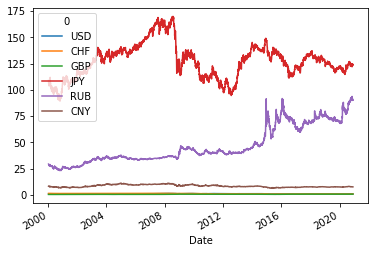

In [74]:
# taux de change
exchange_rates.plot();

Ci-dessous on divise les taux par leur moyenne respective afin d'ajuster les échelles et qu'elles soient comparables.

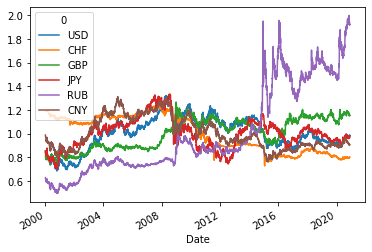

In [75]:
# taux de change divisés par leurs moyennes respectives
(exchange_rates / exchange_rates.mean()).plot();

La méthode `rolling()` permet de produire un graphique avec une moyenne mobile par exemple.

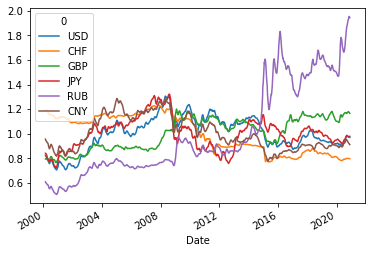

In [76]:
# taux de change divisés par leurs moyennes respectives avec une moyenne mobile de 30 jours
(exchange_rates / exchange_rates.mean()).rolling(30).mean().plot();

<div class="alert alert-success">
<b>Exercise 4</b>
<ul>
    <li>Afficher un graphique des taux de change divisés par leurs dernières valeurs avec une moyenne mobile de 30 jours</li>
    <li>Afficher un graphique des taux de change divisés par leurs moyennes respectives avec un maximum mobile de 100 jours</li>
</ul>
</div>

In [77]:
exchange_rates

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
...,...,...,...,...,...,...
2020-11-18,1.1868,1.0812,0.89373,123.28,90.0610,7.7820
2020-11-19,1.1832,1.0797,0.89378,123.08,90.2638,7.7927
2020-11-20,1.1863,1.0811,0.89393,123.18,90.2622,7.7916


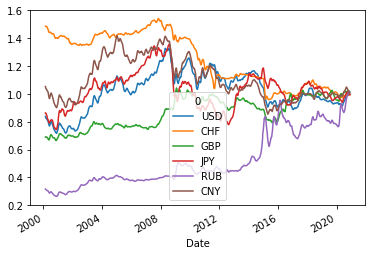

In [78]:
(exchange_rates / exchange_rates.iloc[-1]).rolling(30).mean().plot();

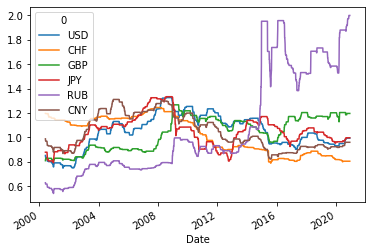

In [79]:
(exchange_rates / exchange_rates.mean()).rolling(100).max().plot();